In [102]:
import pandas as pd
import os
import matplotlib.pyplot as plt

Merging all CSV files to concentrate the data

In [103]:
files = [file for file in os.listdir("./Sales_Data/")]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv(f"./Sales_Data/{file}")
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv('all_data.csv', index=False)

Reading the updated CSV file and cleaning data

In [104]:
all_data = pd.read_csv('./all_data.csv')


In [105]:

all_data = all_data.dropna(how='all')

In [106]:
all_data = all_data[all_data['Order Date'].str[0:2] !='Or']
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

Adding Additional colums to dataframe

In [107]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = pd.to_numeric(all_data['Month'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [108]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


In [109]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [110]:
results = all_data.groupby('Month').sum()

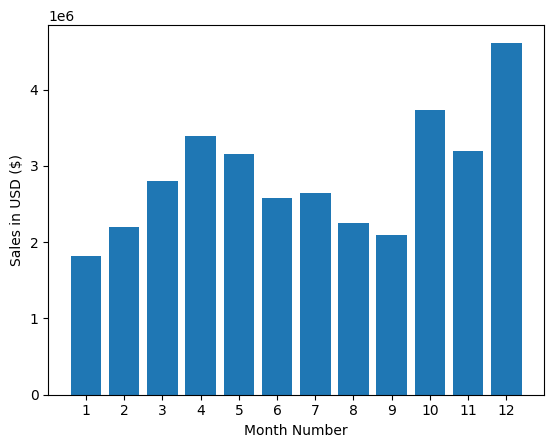

In [111]:
months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month Number')
plt.show()

City with most sales

In [112]:
most_sales = all_data.groupby('City').sum()




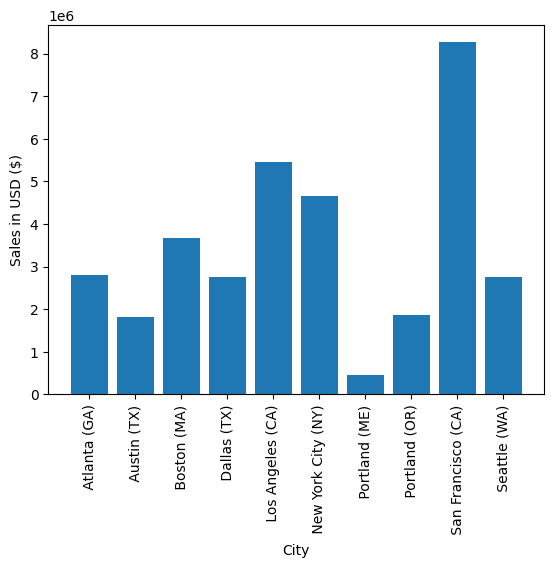

In [113]:
cities = [city for city, df in all_data.groupby('City')]
plt.bar(cities, most_sales['Sales'])
plt.xticks(cities, rotation = 'vertical')
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.show()

What is the best time to advertise to maximize likelihood of a customer buying a product?

In [114]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


C:\Users\USER\AppData\Local\Temp\ipykernel_57724\1582524897.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


In [115]:
all_data['Hour'] = all_data['Order Date'].dt.hour


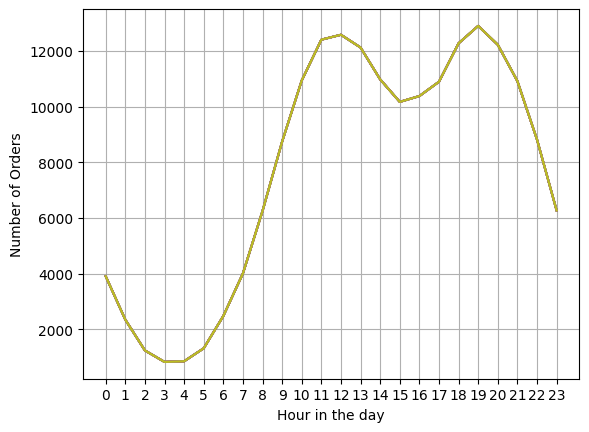

In [116]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby('Hour').count())
plt.xticks(hours)
plt.xlabel('Hour in the day')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

# My recommendation is to display adds around 11am and 7pm

What Products are often sold together?

In [117]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()



C:\Users\USER\AppData\Local\Temp\ipykernel_57724\2719580235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [118]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key, value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


What Product sold the most?

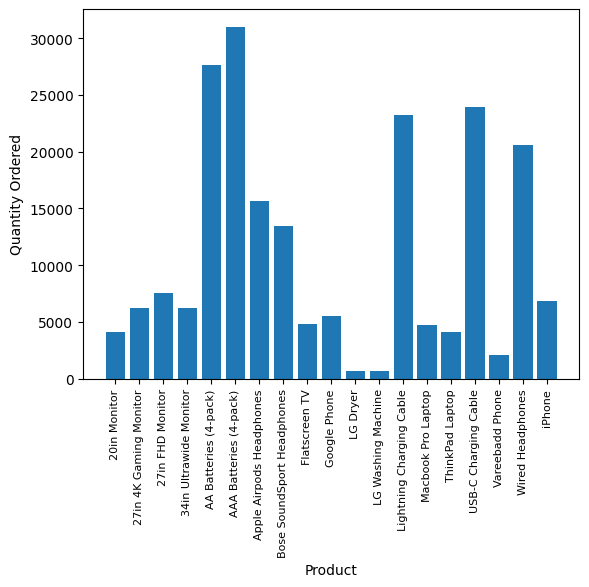

In [119]:

product_group = all_data.drop("Order Date", axis=1)
product_group = product_group.groupby('Product')
quantity_ordered = product_group.sum()["Quantity Ordered"]
products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size=8)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.show()





C:\Users\USER\AppData\Local\Temp\ipykernel_57724\14222060.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


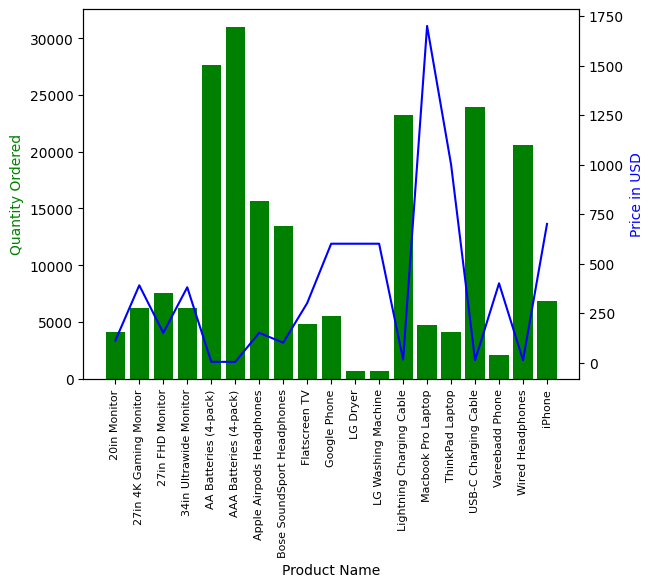

In [134]:
prices = all_data.drop('Purchase Address', axis=1)
prices = prices.drop('City', axis=1)
price_list = prices.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products,quantity_ordered, color='g')
ax2.plot(products, price_list, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel("Quantity Ordered", color='g')
ax2.set_ylabel("Price in USD" ,color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)
plt.show()